In [33]:
import re
from pymystem3 import Mystem
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import torch
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch.utils.data
import matplotlib.pyplot as plt

mystem = Mystem()

In [2]:
def seq_of_lemmas(text):
    return ' '.join(list(filter(lambda x: x.isalpha(), mystem.lemmatize(text))))

In [3]:
texts = []
with open('texts_train.txt', 'r') as tests_f:
    texts = list(map(seq_of_lemmas, list(tests_f.readlines())))
    
scores = []
with open('scores_train.txt', 'r') as scores_f:
    scores = list(map(int, scores_f.readlines()))

In [4]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X = vectorizer.fit_transform(texts)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, scores, test_size=0.2)

In [7]:
tensor_train = torch.tensor(np.hstack([X_train.toarray(), np.array(y_train).reshape((-1, 1))]))

In [8]:
tensot_test = torch.tensor(np.hstack([X_test.toarray(), np.array(y_test).reshape((-1, 1))]))

In [11]:
dataset = torch.utils.data.DataLoader(tensor_train, batch_size=200)

In [73]:
class FNN(nn.Module):
    def __init__(self):
        super(FNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(5000, 40),
            nn.Sigmoid(),
            nn.Dropout(0.5),
            nn.Linear(40, 40),
            nn.Sigmoid(),
            nn.Dropout(0.5),
            nn.Linear(40, 40),
            nn.Sigmoid(),
            nn.Dropout(0.5),
            nn.Linear(40, 40),
            nn.Sigmoid(),
            nn.Dropout(0.5),
            nn.Linear(40, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        z = self.model(x)
        return z * 5 + 5.5
    
def J(output, target):
    return F.mse_loss(output, target)

In [29]:
"""
encode_dict = dict(zip(vectorizer.get_feature_names(), range(len(vectorizer.get_feature_names()))))
class SentimentModel(nn.Module):
    def __init__(self):
        super(SentimentModel, self).__init__()
        self.embedding = nn.Embedding(len(encode_dict), 128)
        self.lstm1 = nn.LSTM(128, 128)
        self.lstm2 = nn.LSTM(128, 128)
        self.linear = nn.Linear(128, 10)
    
    def forward(self, x):
        embeds = self.embedding(x)
        out2 = torch.zeros(10)
        hidden1 = torch.zeros(128)
        hidden2 = torch.zeros(128)
        for embed in embeds:
            out1, hidden1 = self.lstm1(embed, hidden1)
            out2, hidden2 = self.lstm2(out1, hidden2)
        z = out2
        return F.softmax(z, dim=-1)

"""

In [78]:
num_epochs = 150
model = FNN()
sgd = optim.Adam(model.parameters())

train_losses = []
test_losses = []
for epoch in range(num_epochs):
    avg_loss = 0
    for batch in dataset:
        X = batch[:,:-1]
        y = batch[:,-1:]
        sgd.zero_grad()
        loss = J(model(X.float()), y.float())
        avg_loss += loss * len(batch)
        loss.backward()
        sgd.step()
    train_losses.append(float(loss) / len(tensor_train))
    X = tensot_test[:,:-1]
    y = tensot_test[:,-1:]
    test_losses.append(float(J(model(X.float()), y.float())) / len(tensot_test))

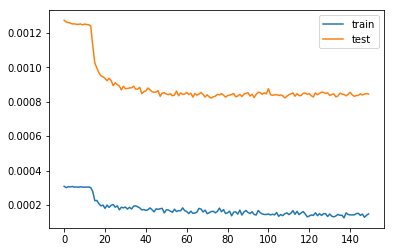

In [79]:
plt.plot(range(num_epochs), train_losses)
plt.plot(range(num_epochs), test_losses)
plt.legend(['train', 'test'])

In [80]:
test_texts = []
with open('dataset_40757_1.txt', 'r') as test_f:
    test_texts = list(map(seq_of_lemmas, list(test_f.readlines())))

In [81]:
X = vectorizer.transform(test_texts)

In [82]:
tensor_X = torch.tensor(X.toarray())

In [83]:
ans = list(map(lambda x: round(x[0]), model(tensor_X.float()).tolist()))

In [84]:
with open('result.txt', 'w') as result_f:
    for val in ans:
        result_f.write(f'{val}\n')

In [85]:
cat result.txt

9
6
9
9
10
10
8
9
9
9
10
9
6
6
9
7
6
8
9
9
10
6
9
6
9
9
9
6
8
9
9
9
9
6
8
9
9
9
9
6
8
8
6
6
6
9
9
8
9
9
9
6
9
9
6
9
9
9
9
8
9
8
9
9
6
9
9
9
9
6
9
7
9
9
6
9
9
9
6
8
6
9
6
8
6
9
9
10
8
6
8
8
9
6
9
9
9
6
10
6
6
6
9
8
8
9
9
9
9
10
6
6
9
9
9
6
8
6
9
9
9
8
6
6
9
6
9
9
9
8
10
6
9
9
9
9
8
6
9
8
9
6
8
8
6
8
6
6
8
9
9
6
9
8
9
9
6
9
9
9
6
9
6
9
9
9
9
9
10
6
8
8
6
8
8
8
6
9
6
10
8
6
6
8
9
9
6
9
9
6
8
8
8
6
8
6
10
9
9
9
9
9
6
8
9
6
9
9
6
9
9
9
8
6
9
9
8
9
9
6
8
9
8
6
6
6
9
6
7
8
6
8
8
6
6
9
9
9
6
8
9
6
9
10
6
9
8
8
8
8
8
10
9
8
6
9
8
9
9
8
8
9
9
6
9
8
9
6
9
9
9
9
9
10
9
9
9
10
6
9
6
9
8
8
9
8
6
9
9
6
6
6
8
8
8
8
6
9
6
6
9
9
8
8
8
6
9
9
8
6
9
9
8
9
9
9
9
9
6
9
6
6
6
9
9
9
8
6
8
8
9
9
9
6
6
6
9
9
9
7
6
9
8
6
8
9
6
6
9
6
9
8
6
9
9
9
9
8
9
10
6
8
6
6
9
8
8
8
9
6
9
8
9
9
6
7
9
6
6
8
6
8
6
9
9
9
9
9
9
9
9
6
6
9
6
8
10
9
8
6
8
8
6
9
9
9
9
9
6
9
6
9
8
7
6
8
7
8
6
9
8
9
8
6
9
9
9
6
8
9
9
9
6
8
9
9
7
6
8
8
6
6
6
9
8
8
9
8
6
8
9
8
8
6
9
9
9
9
7
9
6
6
6
8
8
8
7
9
9
9
9
9
6
9
9
9
9
6
9
7
8
9
10
8
8
8
6
8
8
9
9
